In [1]:
from nbdt.model import SoftNBDT
from nbdt.model import HardNBDT
from nbdt.models import ResNet18, wrn28_10_cifar10, wrn28_10_cifar100, wrn28_10  # use wrn28_10 for TinyImagenet200
from torchvision import transforms
from nbdt.utils import DATASET_TO_CLASSES, load_image_from_path, maybe_install_wordnet
from IPython.display import display
import foolbox as fb
import torch
import torchvision
#import advertorch as at
from PIL import Image

not enough values to unpack (expected 2, got 0)


In [2]:
model = ResNet18()
model.linear = torch.nn.Linear(in_features=512, out_features=200, bias=True)
model = HardNBDT(
  pretrained=True,
  dataset='TinyImagenet200',
  arch='ResNet18',
  hierarchy='wordnet',
  model=model)

transforms_t = transforms.Compose([
  transforms.Resize(32),
  transforms.CenterCrop(32),
  transforms.ToTensor(),
  transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
])

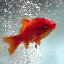

In [56]:
original = load_image_from_path('./test_1.jpeg')
display(original)

In [4]:
from PIL import Image, ImageFilter  
test_1 = original.filter(ImageFilter.GaussianBlur(radius = 2)) 
test_2 = original.filter(ImageFilter.FIND_EDGES)

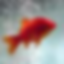

In [5]:
display(test_1)

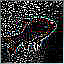

In [6]:
display(test_2)

In [8]:
c = transforms_t(test_1)[None]
output_1 = model.forward_with_decisions(c)
output_1

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]]),
 [[{'node': <nbdt.data.custom.Node at 0x12f0b5d68>, 'name': 'root', 'prob': 1

In [9]:
e = transforms_t(test_2)[None]
output_2 = model.forward_with_decisions(e)
output_2

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0.]]),
 [[{'node': <nbdt.data.custom.Node at 0x12f0b5d68>, 'name': 'root', 'prob': 1

In [16]:
tree_1, tree_2 = output_1[1][0], output_2[1][0]
i = 0
while (tree_1[i]['name'] == tree_2[i]['name']):
    print ('same node:' + tree_1[i]['name'])
    i += 1
    
print('split at: ' + tree_1[i-1]['name'])

same node:root
same node:object
same node:whole
split at: whole


In [19]:
prob_1, prob_2 = tree_1[i]['prob'], tree_2[i]['prob']
traverse = len(tree_1) + len(tree_2) - 2*i

In [20]:
print(prob_1, prob_2, traverse)

0.3453284502029419 0.7432443499565125 6


In [25]:
e ** (-2)

tensor([[[[1.9045e+01, 7.1439e-01, 9.4294e-01,  ..., 3.2722e+00,
           3.0794e+00, 2.4568e+00],
          [7.5738e-01, 6.7495e-01, 4.4044e-01,  ..., 8.0437e-01,
           2.5934e+00, 1.6680e+00],
          [5.4587e-01, 1.3538e+00, 8.8351e-01,  ..., 9.7493e-01,
           7.5738e-01, 3.4836e+00],
          ...,
          [4.9250e+00, 3.7041e-01, 3.6284e-01,  ..., 2.4979e-01,
           2.4979e-01, 3.2722e+00],
          [1.5970e+00, 3.4149e-01, 4.3065e-01,  ..., 2.6306e-01,
           2.6306e-01, 3.4836e+00],
          [9.1077e+00, 2.1059e+00, 8.2388e+00,  ..., 3.7161e+00,
           4.5727e+00, 1.4252e+01]],

         [[6.4996e+02, 9.4976e-01, 1.3203e+00,  ..., 8.9879e+00,
           7.3768e+00, 6.1630e+00],
          [1.0173e+00, 8.0772e-01, 5.1780e-01,  ..., 9.8264e-01,
           4.1755e+00, 3.4126e+00],
          [6.9532e-01, 1.7821e+00, 1.0922e+00,  ..., 1.2693e+00,
           9.4976e-01, 1.2609e+01],
          ...,
          [3.8858e+01, 4.4827e-01, 4.2819e-01,  ..., 2.6946

In [54]:
metric = (1.2)**(-1) * (traverse/16) * abs(prob_1 - prob_2)

In [55]:
metric

0.13565314764326267

In [70]:
def metric(img_1, img_2):
    
    # Get picture.
    transformed_1 = transforms_t(img_1)[None]
    transformed_2 = transforms_t(img_2)[None]
    out_1 = model.forward_with_decisions(transformed_1)
    out_2 = model.forward_with_decisions(transformed_2)
    
    
    tree_1, tree_2 = out_1[1][0], out_2[1][0]
    i = 0
    while (tree_1[i]['name'] == tree_2[i]['name']):
        #print ('same node:' + tree_1[i]['name'])
        i += 1
    
    print('split at: ' + tree_1[i-1]['name'])
    
    prob_1, prob_2 = tree_1[i]['prob'], tree_2[i]['prob']
    traverse = len(tree_1) + len(tree_2) - 2*i
    
    result = (1.2)**(-i) * (traverse/16) * abs(prob_1 + prob_2) # Change constant and should be normolized.
    
    return result

In [71]:
metric(original, test_1)

split at: whole


0.1350107400126203